# **Homework EDA**

**Kelompok 4 - Batch 5**<br>
Members: <br>
1. Wesly Daud Siahaan
2. RIZKI NURHAFIZD ACHMAD
3. DWI MUTIARA SENEN
4. Muhammad Luthfi Nurhadi
5. CHELLCIA MUTIARA IWFANKA
6. ARZAD LINTANG MAHARANI
7. MUHAMMAD FATHUR ARKANA
8. Saniyah Rizkiyah

**Tentang dataset:**</br>
Dataset ini milik perusahaan E-Commerce online. Sebuah perusahaan ritel online (E-commerce) ingin mengetahui pelanggan yang akan berhenti bertransaksi, sehingga mereka dapat mendekati pelanggan untuk menawarkan beberapa promosi.

https://www.kaggle.com/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

**Step-by-step :**

1.   Descriptive Statistics (Handling missing values, duplicates)<br>
2.   Univariate Analysis (Handling outliers skewed & bimodal)<br>
3.   Exploratory Data Analysis/EDA<br>
4.   Business Insight (Feature Engineering, Selection, Standardization)<br>

**Pertama, import libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams["patch.force_edgecolor"] = True
%matplotlib inline

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 5
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# **1. Descriptive Statistics**

In [3]:
df = pd.read_excel('E Commerce Dataset.xlsx')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
df.shape

(5630, 20)

## A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [18]:
# Semua tipe data sudah sesuai, tetapi untuk memudahkan dalam mengolah data, kami mengganti nama column menjadi lebih simpel
df = df.rename(columns={'PreferredPaymentMode': 'PayMethod',
                        'MaritalStatus': 'Status',
                        'PreferredLoginDevice': 'LoginDevice',
                        'PreferedOrderCat': 'OrderCat',
                        'NumberOfDeviceRegistered' : 'DeviceRegistered',
                        'CashbackAmount' : 'Cashback',
                        'OrderAmountHikeFromlastYear' : '%IncreaseOrderLY'})

## B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

In [12]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

Untuk membuat data lebih kuat, nilai pada kolom yang berisi NULL: `Tenure`, `WarehouseToHome`, `HourSpendOnApp`, `%IncreaseOrderLY`, `CouponUsed`, `OrderCount`, dan `DaySinceLastOrder` perlu diganti dengan median, karena distribusinya miring positif (median > mean)

In [19]:
# Fill Null Value - Imputation
df['Tenure'].fillna(df['Tenure'].median(), inplace=True)
df['WarehouseToHome'].fillna(df['WarehouseToHome'].median(), inplace=True)
df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].median(), inplace=True)
df['%IncreaseOrderLY'].fillna(df['%IncreaseOrderLY'].median(), inplace=True)
df['CouponUsed'].fillna(df['CouponUsed'].median(), inplace=True)
df['OrderCount'].fillna(df['OrderCount'].median(), inplace=True)
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(), inplace=True)

In [20]:
# Recheck Null Value
df.isnull().sum()

CustomerID           0
Churn                0
Tenure               0
LoginDevice          0
CityTier             0
WarehouseToHome      0
PayMethod            0
Gender               0
HourSpendOnApp       0
DeviceRegistered     0
OrderCat             0
SatisfactionScore    0
Status               0
NumberOfAddress      0
Complain             0
%IncreaseOrderLY     0
CouponUsed           0
OrderCount           0
DaySinceLastOrder    0
Cashback             0
dtype: int64

In [21]:
# melihat nilai duplicated
df.duplicated().sum()

0

Tidak terdapat data yang duplicated.

**Perlu memeriksa nilai yang tidak biasa/nilai serupa di setiap kolom**

In [22]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'LoginDevice', 'CityTier',
       'WarehouseToHome', 'PayMethod', 'Gender', 'HourSpendOnApp',
       'DeviceRegistered', 'OrderCat', 'SatisfactionScore', 'Status',
       'NumberOfAddress', 'Complain', '%IncreaseOrderLY', 'CouponUsed',
       'OrderCount', 'DaySinceLastOrder', 'Cashback'],
      dtype='object')

In [23]:
df['CityTier']=df['CityTier'].astype('object')

In [24]:
# Split data menjadi numerical and categorical
nums = ['Churn','Tenure','DeviceRegistered','SatisfactionScore','Complain','DaySinceLastOrder','Cashback',
        'WarehouseToHome','NumberOfAddress','HourSpendOnApp','%IncreaseOrderLY','CouponUsed','OrderCount']
cats = ['LoginDevice','CityTier','PayMethod','Gender','OrderCat','Status']

In [25]:
df_halfclean = df.copy()

Unusual/similar data ditemukan di kolom column</br>
`LoginDevice` : Mobile Phone & Phone</br>
`PayMethod` : CC & Credit Card, COD & Cash on delivery</br>
`OrderCat` : Mobile Phone & Mobile

In [26]:
# Replace values
df_halfclean['PayMethod'].replace({"Credit Card": "CC", "Cash on Delivery": "COD"}, inplace=True)
df_halfclean['LoginDevice'].replace({"Mobile Phone": "Phone"}, inplace=True)
df_halfclean['OrderCat'].replace({"Mobile Phone": "Phone", "Mobile": "Phone", "Laptop & Accessory": "Laptop&Acc"}, inplace=True)

## C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq)

In [27]:
# C. Memeriksa summary statistik
df.describe()

,CustomerID,Churn,Tenure,WarehouseToHome,HourSpendOnApp,DeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,%IncreaseOrderLY,CouponUsed,OrderCount,DaySinceLastOrder,Cashback
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,52815.500000,0.168384,10.134103,15.566785,2.934636,3.688988,3.066785,4.214032,0.284902,15.674600,1.716874,2.961812,4.459325,177.223030
std,1625.385339,0.374240,8.357951,8.345961,0.705528,1.023999,1.380194,2.583586,0.451408,3.591058,1.857640,2.879248,3.570626,49.207036
min,50001.000000,0.000000,0.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,3.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,15.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


Tidak terdapat nilai summary yang aneh

## **2. Univariate Analysis (Handling outliers skewed & bimodal)**

In [28]:
#nums1 tanpa kolom 'Churn'
nums1 = ['Tenure','DeviceRegistered','SatisfactionScore','DaySinceLastOrder','Cashback',
        'WarehouseToHome','NumberOfAddress','HourSpendOnApp','%IncreaseOrderLY','CouponUsed','OrderCount']

In [29]:
# Periksa Deskriptif Statistik sebelum menangani outlier
df_halfclean[nums1].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tenure,5630.0,10.134103,8.357951,0.0,3.00,9.00,15.0000,61.00
DeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
DaySinceLastOrder,5630.0,4.459325,3.570626,0.0,2.00,3.00,7.0000,46.00
Cashback,5630.0,177.223030,49.207036,0.0,145.77,163.28,196.3925,324.99
WarehouseToHome,5630.0,15.566785,8.345961,5.0,9.00,14.00,20.0000,127.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
HourSpendOnApp,5630.0,2.934636,0.705528,0.0,2.00,3.00,3.0000,5.00
%IncreaseOrderLY,5630.0,15.674600,3.591058,11.0,13.00,15.00,18.0000,26.00
CouponUsed,5630.0,1.716874,1.857640,0.0,1.00,1.00,2.0000,16.00


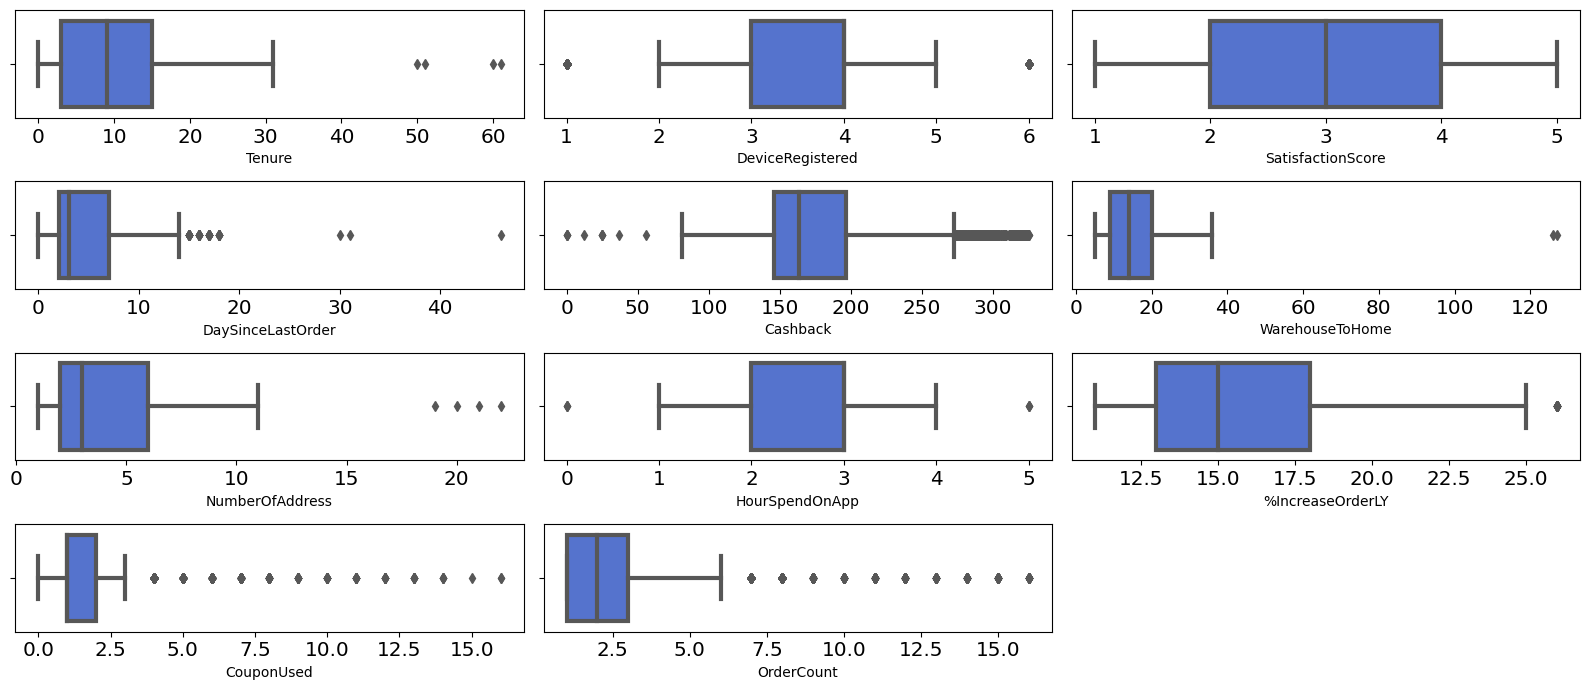

In [30]:
plt.figure(figsize=(16, 7))
for i in range(0, len(nums1)):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=df_halfclean[nums1[i]], color='royalblue')
    plt.xlabel(nums1[i])
    plt.tight_layout()

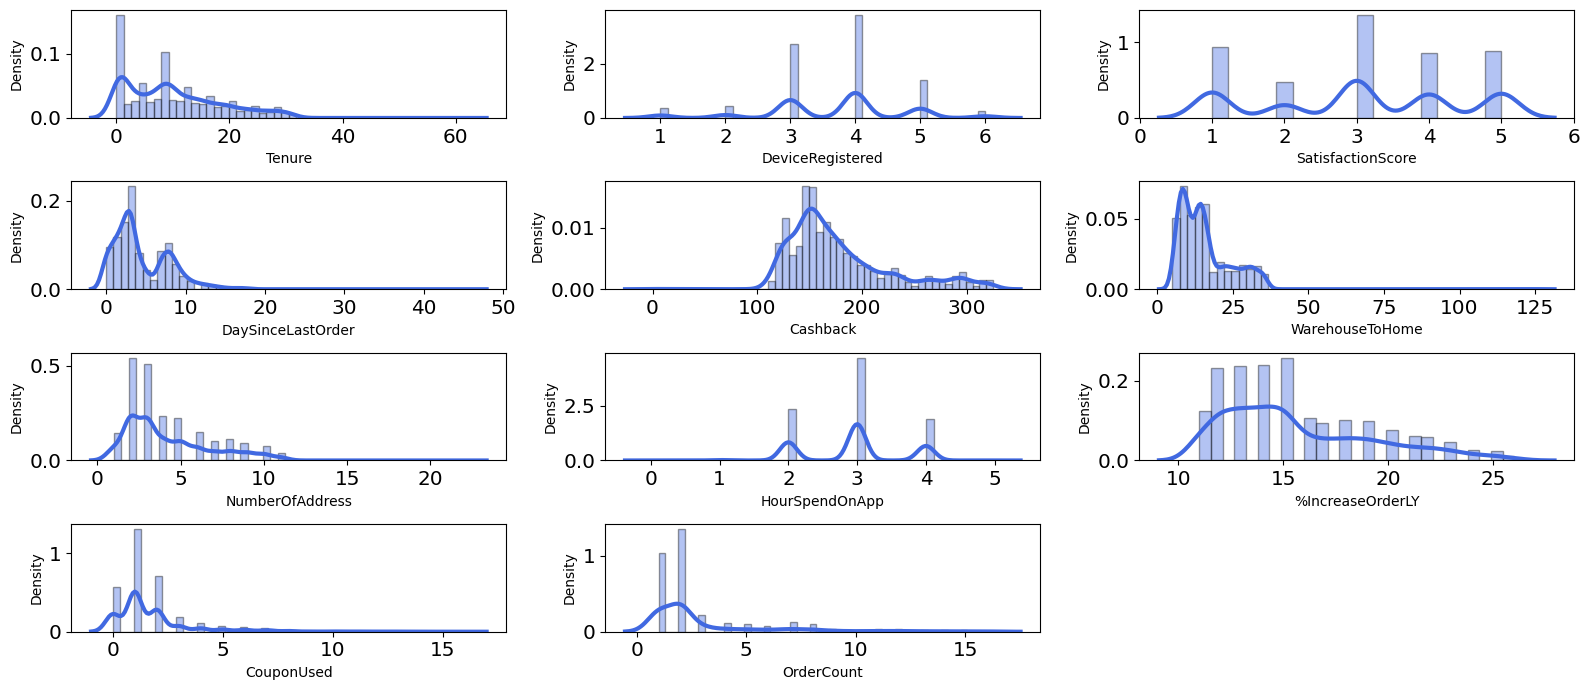

In [31]:
plt.figure(figsize=(16, 7))
for i in range(0, len(nums1)):
    plt.subplot(4, 3, i+1)
    sns.distplot(x=df_halfclean[nums1[i]], color='royalblue')
    plt.xlabel(nums1[i])
    plt.tight_layout()

In [32]:
df_clean = df_halfclean.copy()

In [33]:
# Remove Outliers
print(f'# Row before handling outliers: {len(df)}')

filtered_entries = np.array([True] * len(df_clean))
for col in df_clean[nums1].columns:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_clean[col] >= low_limit) & (df_clean[col] <= high_limit)) & filtered_entries

df_clean_IQR = df_clean[filtered_entries]

print(f'# Row after handling outliers: {len(df_clean_IQR)}')

# Row before handling outliers: 5630
# Row after handling outliers: 4048


In [34]:
# Check Statistical Descriptive after handling outliers
df_clean_IQR[nums1].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tenure,4048.0,8.997036,7.853489,0.0,2.0000,8.000,13.00,31.00
DeviceRegistered,4048.0,3.730731,0.802839,2.0,3.0000,4.000,4.00,5.00
SatisfactionScore,4048.0,3.061265,1.374771,1.0,2.0000,3.000,4.00,5.00
DaySinceLastOrder,4048.0,3.653409,2.930154,0.0,2.0000,3.000,5.00,14.00
Cashback,4048.0,164.310581,33.776952,81.0,142.4675,155.675,180.07,272.32
WarehouseToHome,4048.0,15.590662,7.961340,5.0,9.0000,14.000,20.00,36.00
NumberOfAddress,4048.0,4.220109,2.561084,1.0,2.0000,3.000,6.00,11.00
HourSpendOnApp,4048.0,2.933794,0.700922,1.0,2.0000,3.000,3.00,4.00
%IncreaseOrderLY,4048.0,15.648962,3.523937,11.0,13.0000,15.000,18.00,25.00
CouponUsed,4048.0,1.151186,0.825746,0.0,1.0000,1.000,2.00,3.00


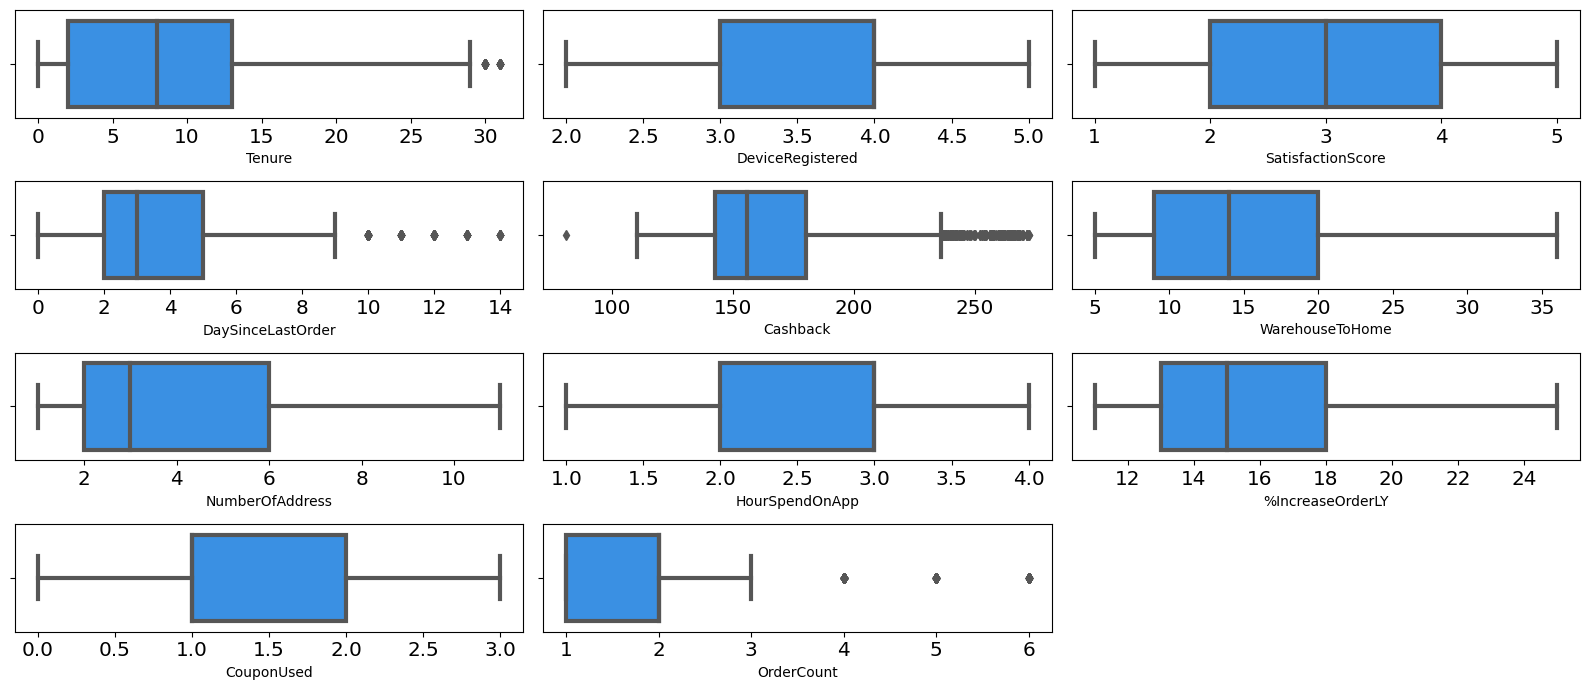

In [35]:
plt.figure(figsize=(16, 7))
for i in range(0, len(nums1)):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=df_clean_IQR[nums1[i]], color='dodgerblue')
    plt.xlabel(nums1[i])
    plt.tight_layout()

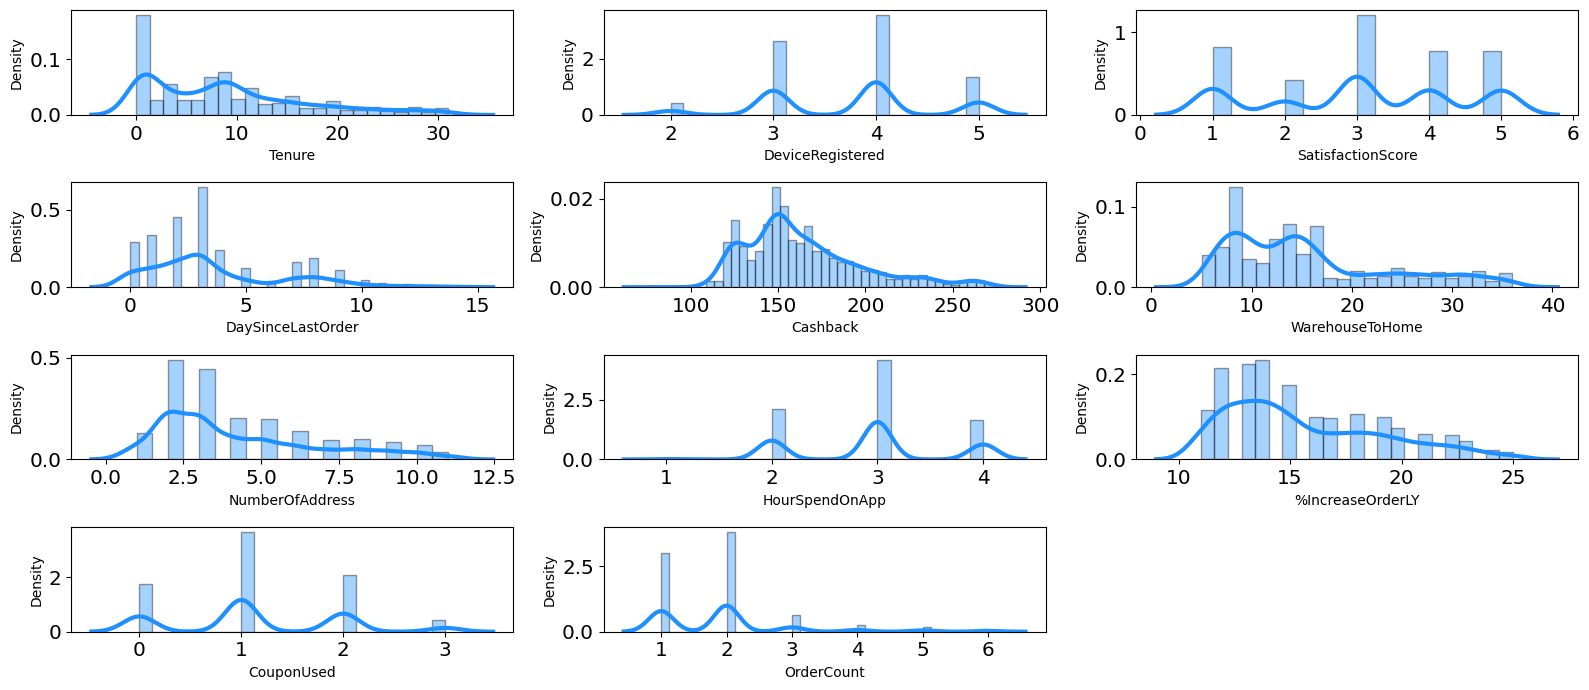

In [36]:
plt.figure(figsize=(16, 7))
for i in range(0, len(nums1)):
    plt.subplot(4, 3, i+1)
    sns.distplot(x=df_clean_IQR[nums1[i]], color='dodgerblue')
    plt.xlabel(nums1[i])
    plt.tight_layout()

# **3. Multivariate Analysis**

## a. Multivariate Analysis</br>
**Heatmap correlation to figure out interaction between features**

In [39]:
nums2 = ['Tenure','DeviceRegistered','SatisfactionScore','Complain','DaySinceLastOrder','Cashback',
        'CityTier','WarehouseToHome','NumberOfAddress','HourSpendOnApp','%IncreaseOrderLY','CouponUsed','OrderCount']

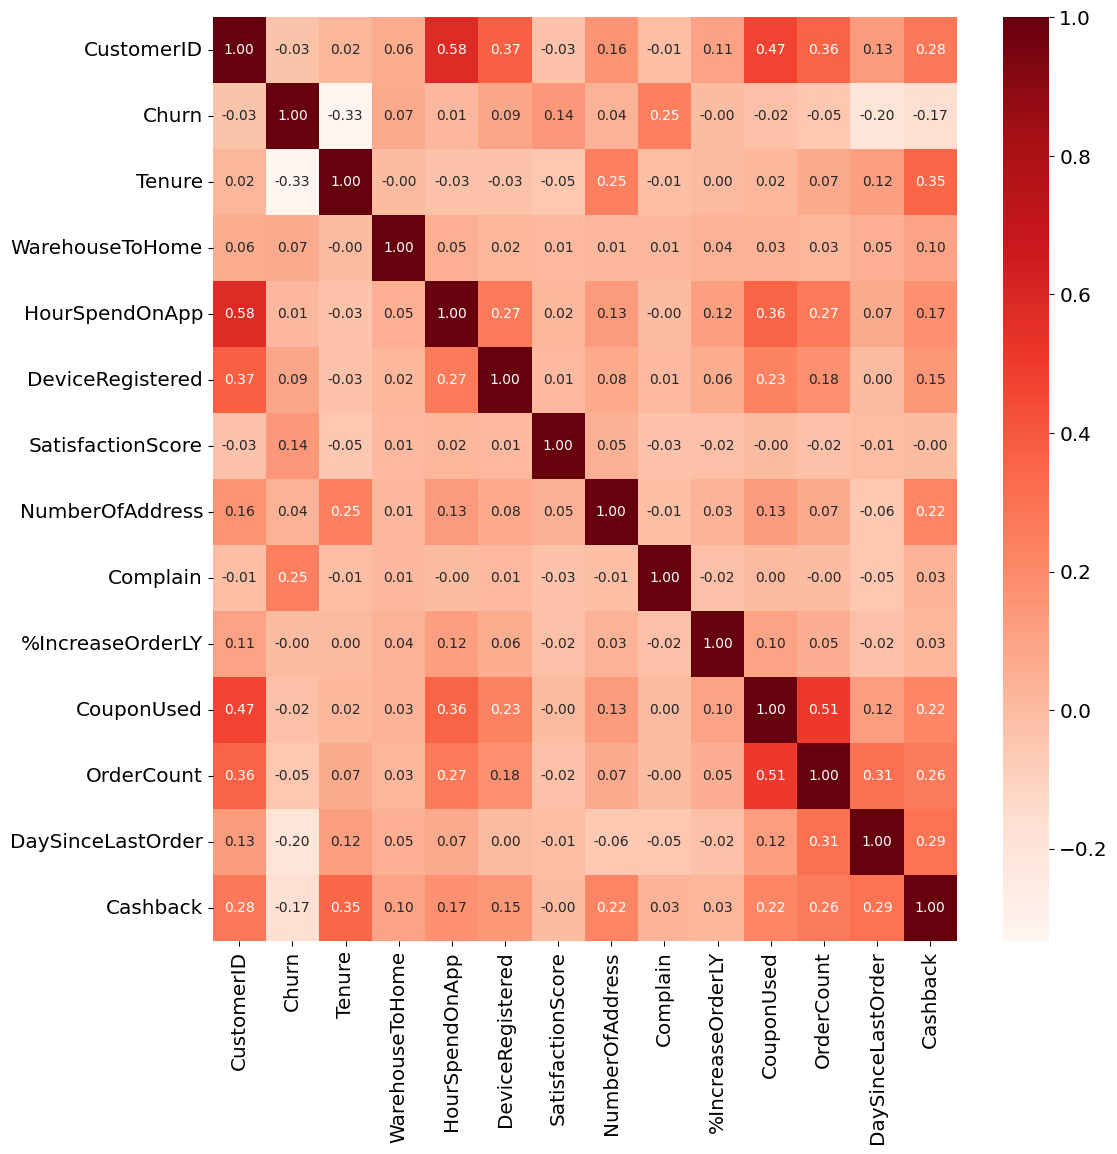

In [40]:
plt.figure(figsize=(12, 12))
sns.heatmap(df_clean_IQR.corr(), annot=True, fmt='.2f', cmap='Reds')
plt.show()

**Analysis :**<br>
* Target Variable: `Churn`
* Weak Correlation (0.1 - 0.4) :
 1. `Churn` menunjukkan korelasi negatif rendah terhadap `Tenure`, `DaySinceLastOrder`, & `Cashback`
 2. `Churn` menunjukkan korelasi positif rendah terhadap `Complain`, `DeviceRegistered`, & `SatisfactionScore`
 3. `Tenure` menunjukkan korelasi positif rendah terhadap `NumberOfAddress`, `OrderCount`, & `DaySinceLastOrder`
 4. `HourSpendOnApp` menunjukkan korelasi positif rendah terhadap `DeviceRegistered`, `%IncreaseOrderLY`, `OrderCount`, & `CouponUsed`
 5. `CouponUsed` menunjukkan korelasi positif rendah terhadap `DaySinceLastOrder` & `Cashback`
 6. `Tenure` menunjukkan korelasi positif rendah terhadap `Cashback`
 7. `DaySinceLastOrder` menunjukkan korelasi positif rendah terhadap `OrderCount`
* Strong Correlation (0.5 - 0.7) (0.5 - 0.7):
 1. `CouponUsed` menunjukkan korelasi positif tinggi terhadap `OrderCount` sehingga salah satu fitur harus dihapus.

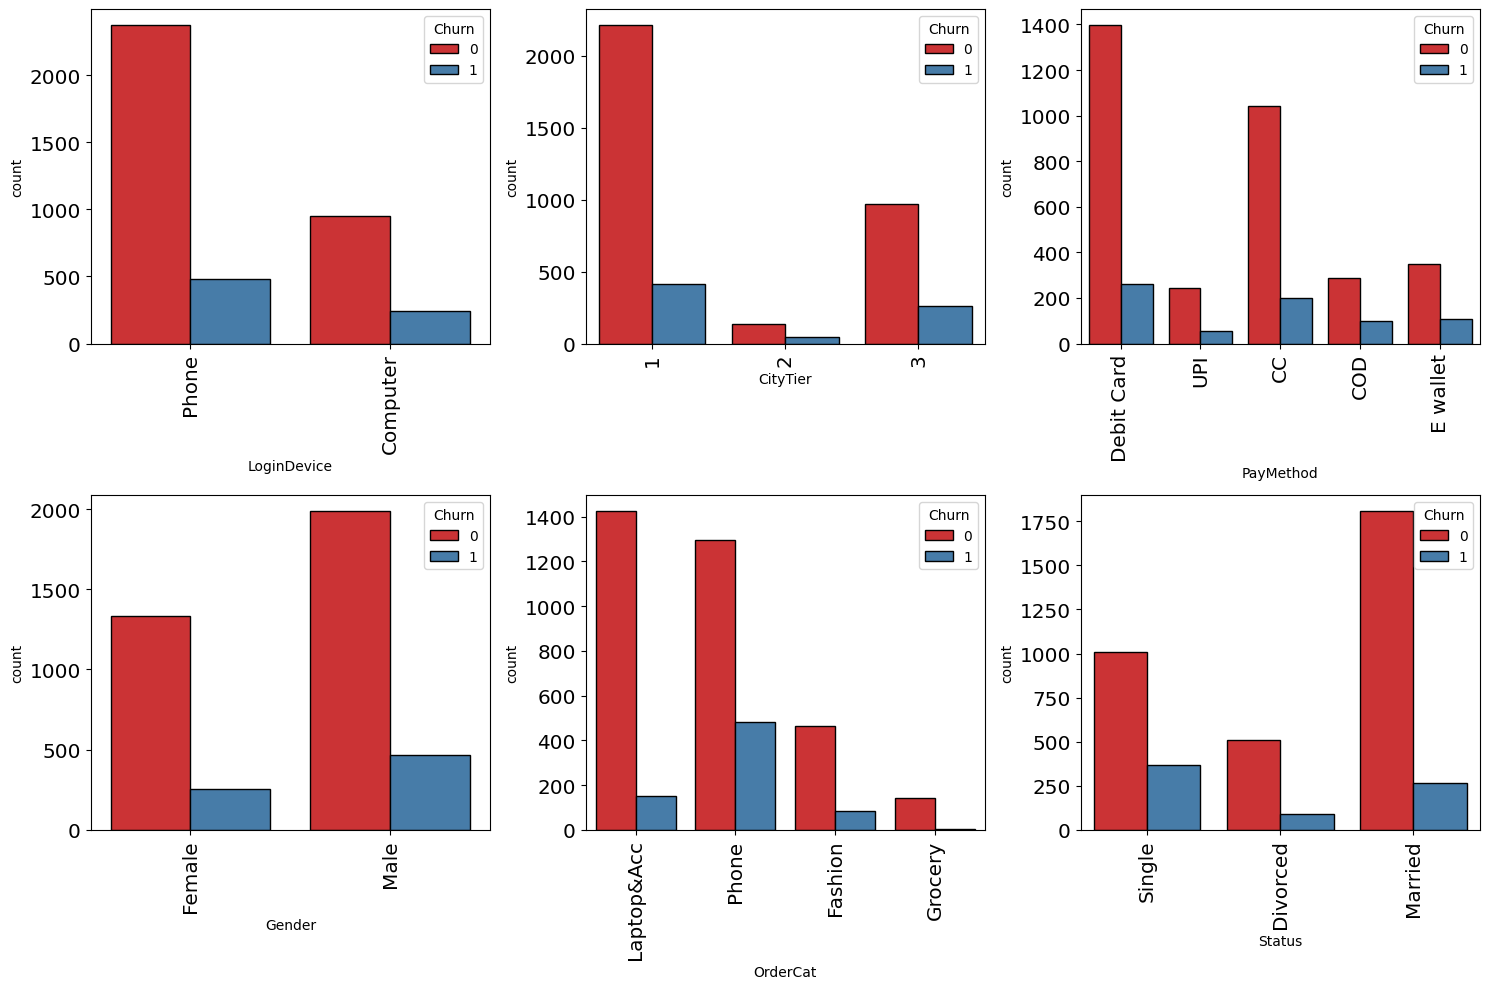

In [41]:
# Categorical Columns vs Target
features = cats
plt.figure(figsize=(15,10))
for i in range(0, len(features)):
    plt.subplot(2,3, i+1)
    sns.countplot(data=df_clean_IQR, hue='Churn', x=features[i], palette='Set1')
    plt.xticks(rotation=90)
    plt.xlabel(features[i])
    plt.tight_layout()

**Analisis:**
* Pengguna *Laki-Laki* mendominasi kolom `Jenis Kelamin` dalam dataset.
* Sebagian besar pelanggan dalam kolom `Status` adalah *menikah*.
* Berdasarkan kolom `Perangkat Login` dan `Jenis Kelamin`, tidak ada perbedaan yang signifikan antara setiap nilai.
* Pelanggan dengan metode pembayaran *COD* cenderung berpotensi untuk churn.
* Pelanggan yang memiliki `Kategori Pesanan` *Telepon* cenderung memiliki tingkat churn yang lebih tinggi.
* Pengguna dengan `Status` *Single* cenderung memiliki tingkat churn yang lebih tinggi dibanding yang lain.

# **4. Business Insight**

## a. Univariate Analysis </br>
**Data visualization of features vs target**

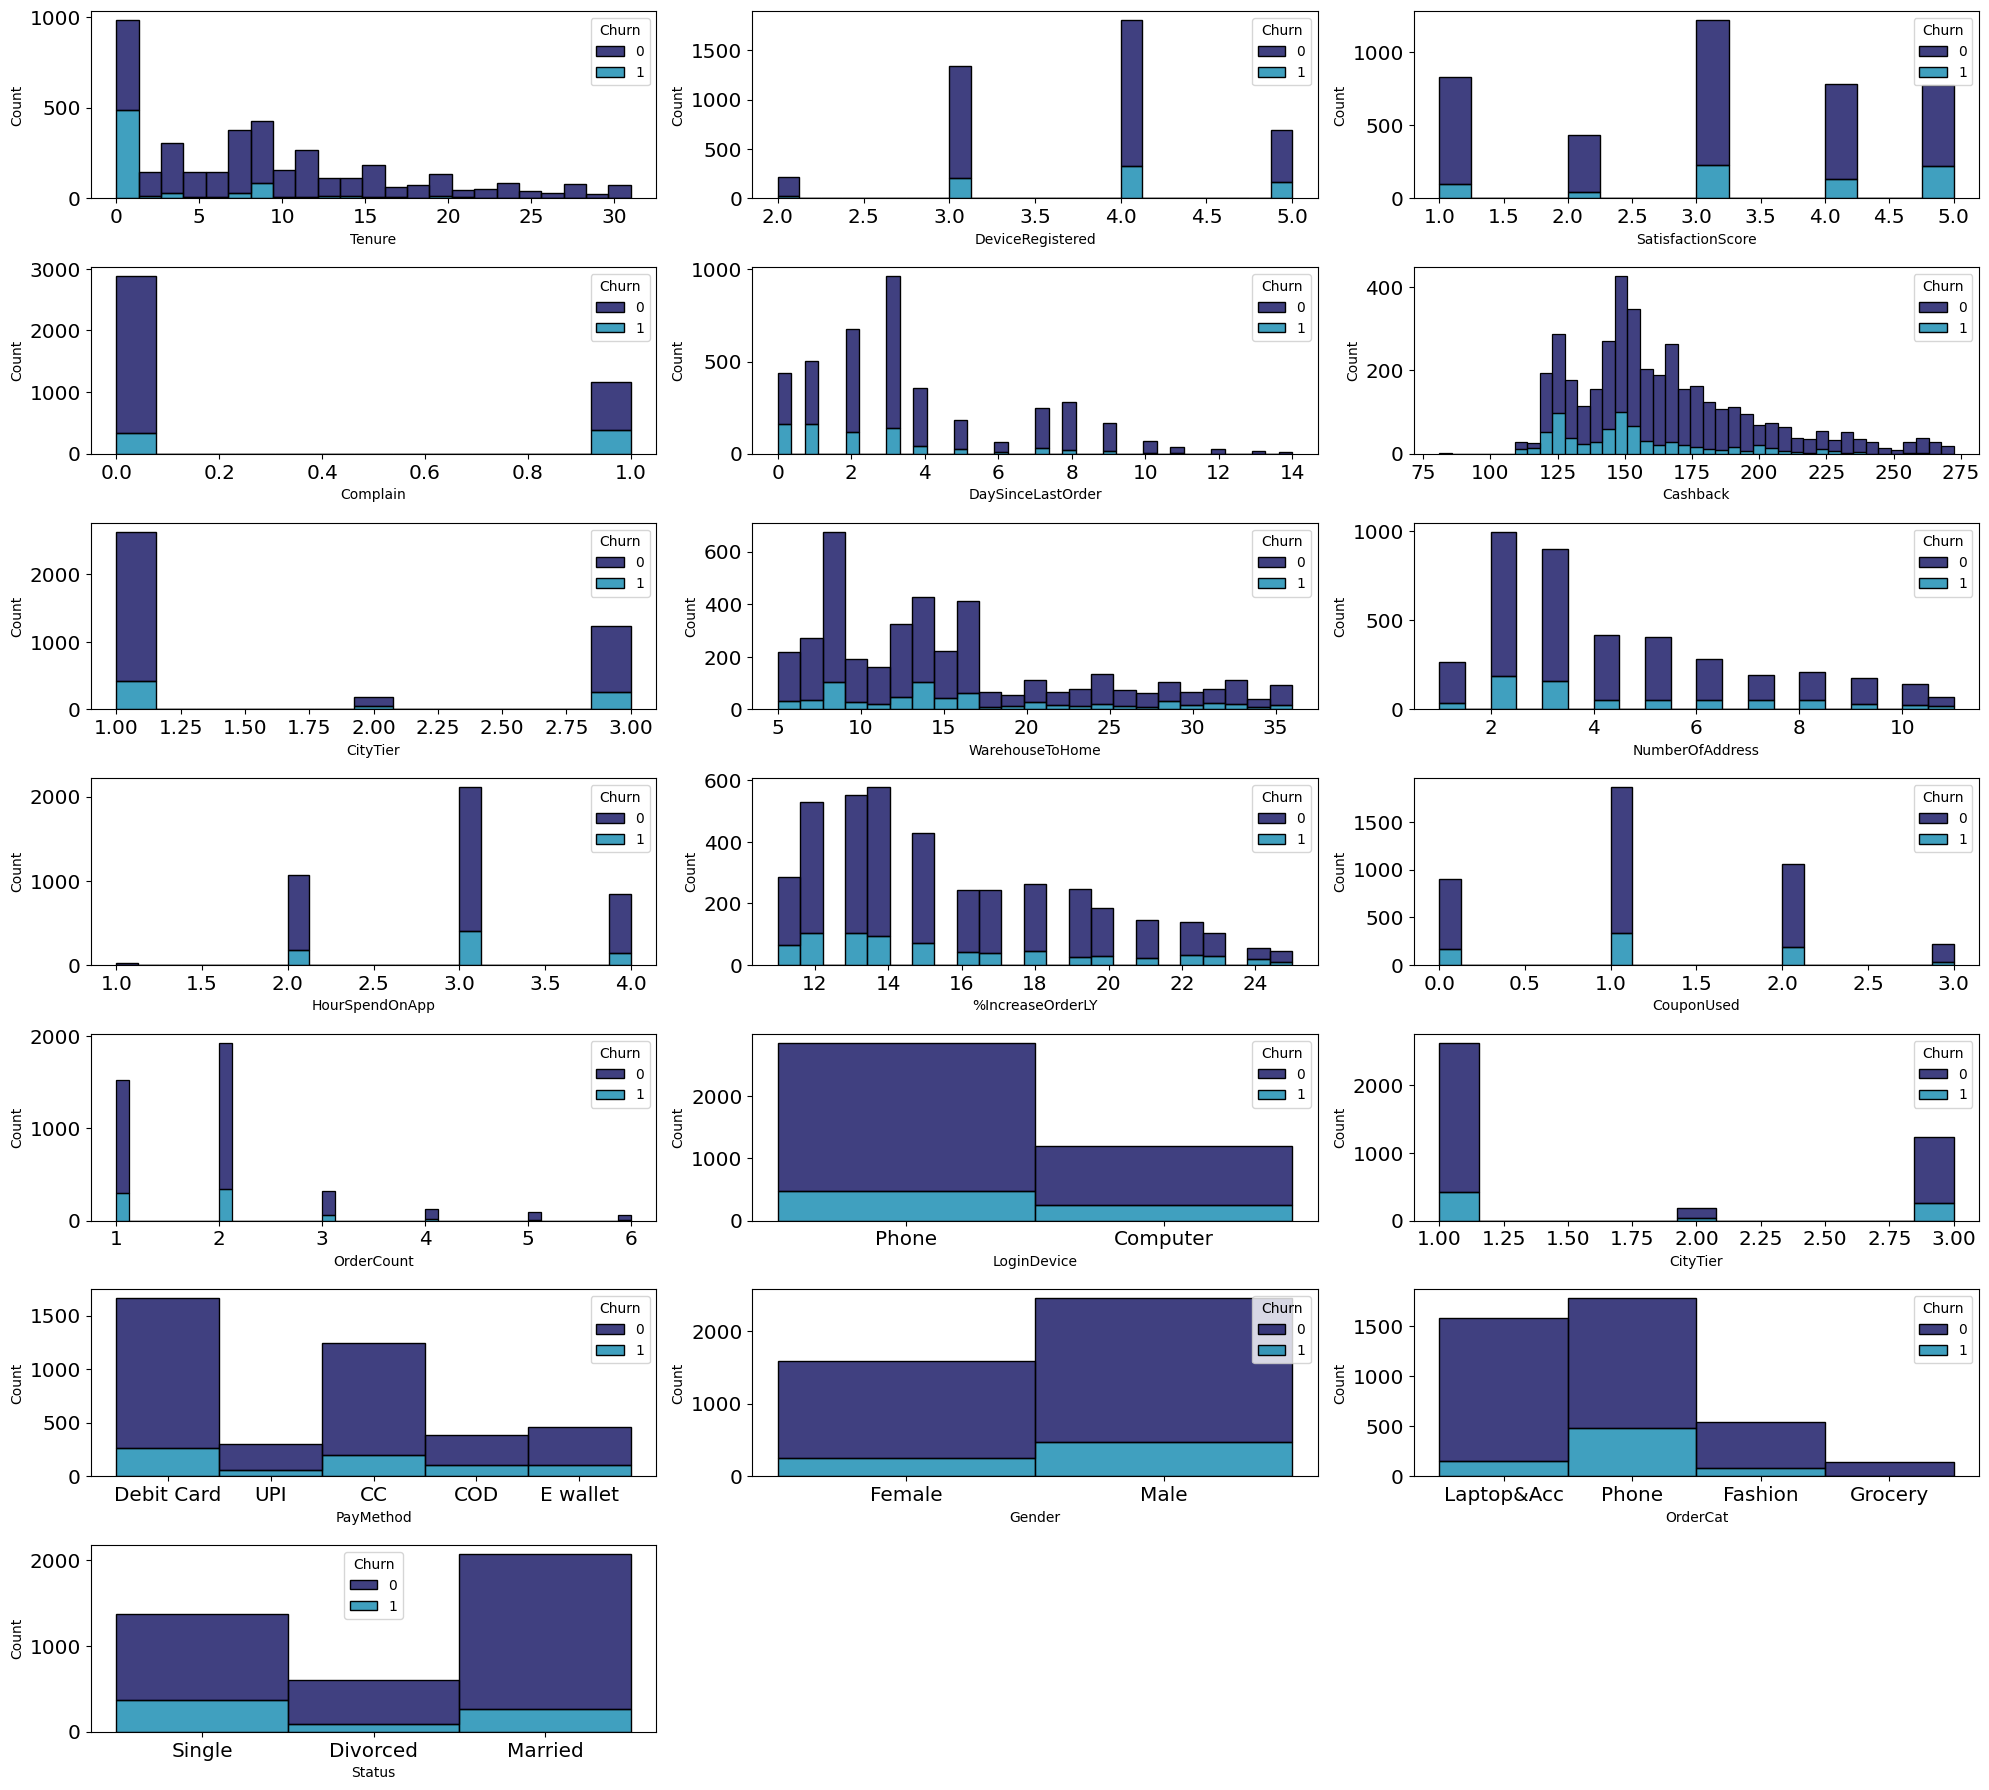

In [43]:
# All Columns vs Target
plt.figure(figsize=(20, 18))
for i, col in enumerate(df_clean_IQR[nums2+cats].columns):
    plt.subplot(7, 3, i+1)
    ax = sns.histplot(x=df_clean_IQR[col], hue=df_clean_IQR['Churn'], data=df_clean_IQR, palette='ocean', multiple='stack')
    plt.tight_layout()

## b. Insight (Additional)

### • Churn Rate vs Complain

In [44]:
dfx = df_clean_IQR.copy()

In [45]:
dfx['Complain_s'] = np.where(dfx['Complain']>0,'Yes','No')
dfx['Churn_s'] = np.where(dfx['Churn']>0,'Yes','No')
dfx.sample(5)

,CustomerID,Churn,Tenure,LoginDevice,CityTier,WarehouseToHome,PayMethod,Gender,HourSpendOnApp,DeviceRegistered,...,Status,NumberOfAddress,Complain,%IncreaseOrderLY,CouponUsed,OrderCount,DaySinceLastOrder,Cashback,Complain_s,Churn_s
4619,54620,0,15.0,Computer,1,9.0,UPI,Female,4.0,5,...,Single,4,1,18.0,1.0,2.0,8.0,193.11,Yes,No
321,50322,0,14.0,Computer,3,16.0,Debit Card,Male,2.0,3,...,Single,8,0,14.0,0.0,1.0,10.0,162.30,No,No
440,50441,0,0.0,Phone,1,16.0,CC,Male,3.0,2,...,Single,2,0,18.0,1.0,1.0,2.0,135.05,No,No
1610,51611,0,2.0,Phone,3,8.0,CC,Male,3.0,4,...,Married,3,0,19.0,1.0,1.0,0.0,166.44,No,No
3870,53871,0,10.0,Phone,1,14.0,Debit Card,Male,4.0,4,...,Single,4,0,12.0,1.0,2.0,4.0,145.13,No,No


In [46]:
dfx1 = dfx.groupby(['Complain_s','Churn_s']).agg({'CustomerID':'nunique'}).reset_index()
dfx1 = dfx1.rename(columns={'CustomerID': 'UniqueCustomer'})
dfx1

,Complain_s,Churn_s,UniqueCustomer
0,No,No,2544
1,No,Yes,341
2,Yes,No,780
3,Yes,Yes,383


In [47]:
dfx2 = dfx.groupby(['Complain_s']).agg({'CustomerID':'nunique'}).reset_index()
dfx2 = dfx2.rename(columns={'CustomerID': 'AllUniqueCustomer'})
dfx2

,Complain_s,AllUniqueCustomer
0,No,2885
1,Yes,1163


In [48]:
dfx_grouped = dfx1.merge(dfx2,
                             left_on = 'Complain_s',
                             right_on = 'Complain_s',
                             how = 'inner')
dfx_grouped

,Complain_s,Churn_s,UniqueCustomer,AllUniqueCustomer
0,No,No,2544,2885
1,No,Yes,341,2885
2,Yes,No,780,1163
3,Yes,Yes,383,1163


In [49]:
dfx_grouped['PercentUniqueCustomer'] = round(100.0 * dfx_grouped['UniqueCustomer']/(dfx_grouped['AllUniqueCustomer']),2)
dfx_grouped

,Complain_s,Churn_s,UniqueCustomer,AllUniqueCustomer,PercentUniqueCustomer
0,No,No,2544,2885,88.18
1,No,Yes,341,2885,11.82
2,Yes,No,780,1163,67.07
3,Yes,Yes,383,1163,32.93


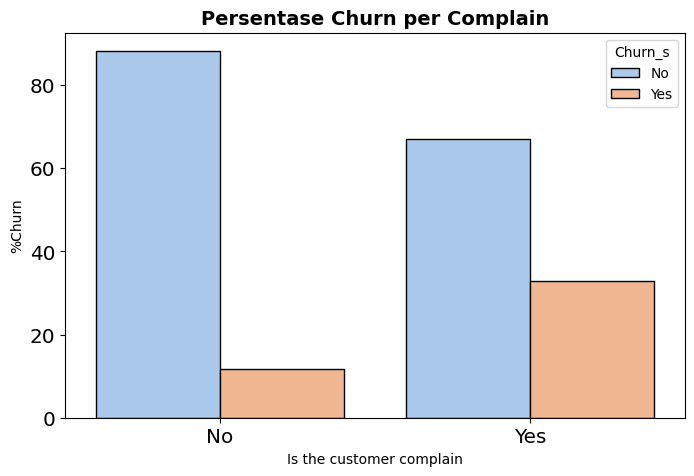

In [50]:
# Percent Churn Based On Complain
plt.figure(figsize = (8,5))
plt.title('Persentase Churn per Complain', fontsize = 14, fontweight='bold')
ax = sns.barplot(x = 'Complain_s', y = 'PercentUniqueCustomer',
                 data = dfx_grouped,
                 palette="pastel",
                 hue = 'Churn_s')
ax.set(xlabel='Is the customer complain', ylabel='%Churn')
ax.xaxis.label.set_size(10)
ax.yaxis.label.set_size(10)
sns.set(style="darkgrid")
plt.show()

**Analysis :**<br>
Terlihat dari tabel pelanggan yang memiliki keluhan cenderung churn 3 kali lebih tinggi dibandingkan yang tidak memiliki keluhan.

### • Churn Rate vs Tenure

In [51]:
dfy = df_clean_IQR.copy()

In [52]:
dfy = dfy.groupby(['Tenure']).agg({'Churn' : 'sum'}).reset_index()
dfy['ChurnPercent'] = round(dfy['Churn']/df['Churn'].count()*100, 2)

dfy.head()

,Tenure,Churn,ChurnPercent
0,0.0,229,4.07
1,1.0,260,4.62
2,2.0,12,0.21
3,3.0,14,0.25
4,4.0,16,0.28


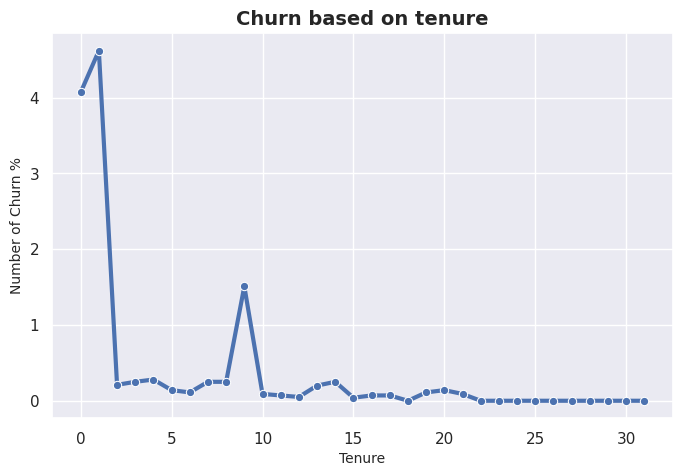

In [53]:
plt.figure(figsize=(8,5))
sns.lineplot(x= 'Tenure', y='ChurnPercent', data=dfy, lw=3, marker='o')

plt.title('Churn based on tenure', fontsize = 14, fontweight='bold')

plt.ylabel('Number of Churn %', fontsize= 10)
plt.xlabel('Tenure', fontsize= 10);

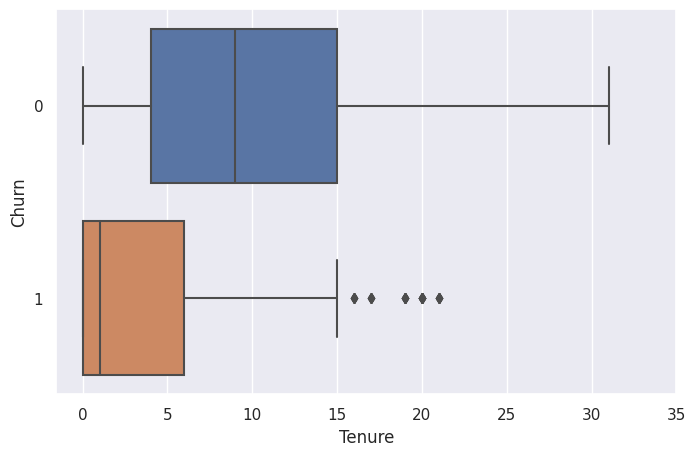

In [54]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Tenure', y='Churn', orient='h',data=df_clean_IQR)
plt.xticks(range(0,40,5))
plt.show()

**Analysis :**<br>
1. Grafik garis menggambarkan kenaikan churn rate ketika tenure berada pada kisaran 0-1. Sementara itu, ketika tenor lebih besar dari 1 tingkat churn menurun secara signifikan.
2. Pelanggan dengan masa kerja lebih dari 21 bulan menunjukkan tidak ada churn.

### • Churn Rate vs Gender

In [55]:
dfz = df_clean_IQR.copy()

In [56]:
dfz1 = dfz.groupby(['Gender']).agg({'CustomerID' : 'nunique'}).reset_index()
dfz1 = dfz1.rename(columns={'CustomerID': 'CustUniq'})
dfz1

,Gender,CustUniq
0,Female,1593
1,Male,2455


In [57]:
dfz2 = dfz.groupby(['Gender','Churn']).agg({'CustomerID' : 'nunique'}).reset_index()
dfz2

,Gender,Churn,CustomerID
0,Female,0,1336
1,Female,1,257
2,Male,0,1988
3,Male,1,467


In [58]:
dfz_grouped =dfz1.merge(dfz2, on= 'Gender')
dfz_grouped['PercentChurn'] = round(dfz_grouped['CustomerID']/dfz_grouped['CustUniq']*100,2)
dfz_grouped

,Gender,CustUniq,Churn,CustomerID,PercentChurn
0,Female,1593,0,1336,83.87
1,Female,1593,1,257,16.13
2,Male,2455,0,1988,80.98
3,Male,2455,1,467,19.02


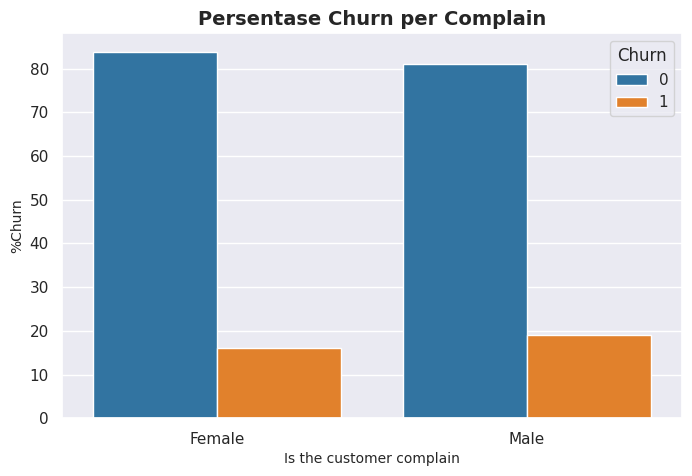

In [59]:
# Percent Churn Based On Gender
plt.figure(figsize = (8,5))
plt.title('Persentase Churn per Complain', fontsize = 14, fontweight='bold')
ax = sns.barplot(x = 'Gender', y = 'PercentChurn',
                 data = dfz_grouped,
                 palette="tab10",
                 hue = 'Churn')
ax.set(xlabel='Is the customer complain', ylabel='%Churn')
ax.xaxis.label.set_size(10)
ax.yaxis.label.set_size(10)
sns.set(style="darkgrid")
plt.show()

**Analysis :**<br>
1. Dari histogram terlihat bahwa pelanggan pria mempunyai kecenderungan churn yang tinggi, dengan persentase churn rate sebesar 17%.
2. Sementara itu, tingkat churn pelanggan perempuan 2% lebih rendah dibandingkan pelanggan laki-laki.

### • Churn Rate vs Segmentasi Tenure

In [60]:
dfz = df_clean_IQR.copy()
dfz.sample(5)

,CustomerID,Churn,Tenure,LoginDevice,CityTier,WarehouseToHome,PayMethod,Gender,HourSpendOnApp,DeviceRegistered,OrderCat,SatisfactionScore,Status,NumberOfAddress,Complain,%IncreaseOrderLY,CouponUsed,OrderCount,DaySinceLastOrder,Cashback
4783,54784,0,4.0,Computer,1,12.0,Debit Card,Male,4.0,5,Phone,1,Married,11,0,13.0,1.0,2.0,4.0,162.61
1153,51154,0,9.0,Phone,1,16.0,Debit Card,Male,2.0,3,Fashion,5,Married,8,1,13.0,1.0,5.0,7.0,183.21
4409,54410,0,19.0,Computer,1,14.0,Debit Card,Male,4.0,2,Laptop&Acc,3,Married,6,0,18.0,2.0,2.0,3.0,189.34
2133,52134,0,1.0,Phone,1,16.0,UPI,Female,2.0,3,Laptop&Acc,3,Single,4,0,13.0,0.0,1.0,7.0,136.60
4310,54311,0,14.0,Computer,1,33.0,CC,Female,3.0,4,Laptop&Acc,4,Married,3,0,12.0,1.0,3.0,14.0,181.05


In [61]:
dfz['TenureSegmentation'] = np.where(dfz['Tenure']>10, 'high', np.where(dfz['Tenure']<3, 'low','mid'))
dfz.sample(5)

,CustomerID,Churn,Tenure,LoginDevice,CityTier,WarehouseToHome,PayMethod,Gender,HourSpendOnApp,DeviceRegistered,...,SatisfactionScore,Status,NumberOfAddress,Complain,%IncreaseOrderLY,CouponUsed,OrderCount,DaySinceLastOrder,Cashback,TenureSegmentation
772,50773,0,30.0,Phone,3,9.0,Debit Card,Female,2.0,4,...,2,Single,6,0,17.0,0.0,1.0,5.0,151.71,high
2864,52865,0,19.0,Phone,3,11.0,Debit Card,Female,2.0,4,...,5,Married,6,1,12.0,1.0,2.0,4.0,175.06,high
2907,52908,1,1.0,Phone,1,7.0,COD,Male,3.0,4,...,3,Single,2,0,15.0,1.0,2.0,6.0,145.58,low
1034,51035,0,12.0,Computer,1,10.0,CC,Female,2.0,3,...,3,Single,1,0,13.0,3.0,3.0,8.0,150.42,high
4961,54962,1,14.0,Computer,3,7.0,UPI,Male,3.0,4,...,3,Single,5,1,15.0,2.0,2.0,1.0,172.28,high


In [62]:
dfzg=dfz.groupby(['TenureSegmentation','Churn']).agg({'CustomerID':'nunique'}).reset_index().rename(columns={'CustomerID':'Total'})
dfzg

,TenureSegmentation,Churn,Total
0,high,0,1305
1,high,1,61
2,low,0,627
3,low,1,501
4,mid,0,1392
5,mid,1,162


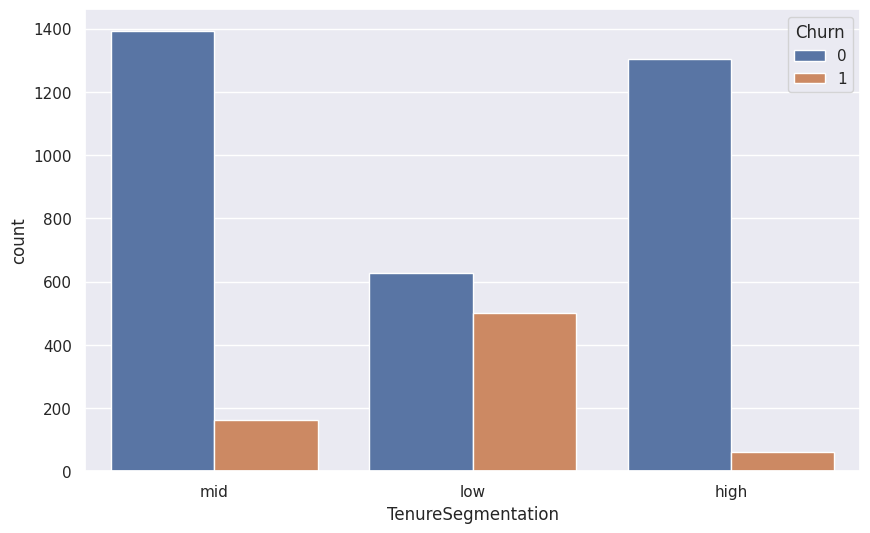

In [63]:
plt.figure(figsize=(10,6))
sns.countplot(x='TenureSegmentation',hue='Churn',data=dfz)
plt.show()

# GIT